# Mamogram data  

Mamogram data is analysed and conclusions are drawn regarding possible treatment.

## Neural network
### Classification problem

## 1. Import libraries

In [83]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2.  Import data

In [84]:
# Import data
df = pd.read_csv('../input/mamo-data/Mamo_data (1).csv', delimiter = ",")

# Explore type of data and feature names
df.sample(10)

,malignanttrue,score,age,shape2,shape3,shape4,margin2,margin3,margin4,margin5,density
296,0,4,34,1,0,0,0,0,0,0,3
772,1,5,67,0,0,1,0,0,0,1,3
44,0,4,49,0,0,0,0,0,0,0,3
568,1,5,58,0,1,0,0,0,1,0,3
364,0,4,36,0,1,0,0,0,0,0,3
492,1,4,57,0,0,1,0,0,1,0,3
210,0,4,55,1,0,0,0,0,0,0,3
694,1,5,36,0,0,1,0,1,0,0,3
6,0,2,57,0,0,0,0,0,0,0,3
234,0,4,41,1,0,0,0,0,0,0,3


**Note:** For the response variable, 0 = FALSE (normal) and 1 = TRUE (malignant).

##  3.  Check quality of data

In [85]:
# Explore the size of the data set
df.shape

(830, 11)

In [86]:
print(df.isnull().sum())

malignanttrue    0
score            0
age              0
shape2           0
shape3           0
shape4           0
margin2          0
margin3          0
margin4          0
margin5          0
density          0
dtype: int64


In [87]:
df.dtypes

malignanttrue    int64
score            int64
age              int64
shape2           int64
shape3           int64
shape4           int64
margin2          int64
margin3          int64
margin4          int64
margin5          int64
density          int64
dtype: object

In [88]:
df.describe(include='all')

,malignanttrue,score,age,shape2,shape3,shape4,margin2,margin3,margin4,margin5,density
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,0.485542,4.333735,55.781928,0.216867,0.097590,0.456627,0.027711,0.127711,0.306024,0.153012,2.915663
std,0.500092,0.688134,14.671782,0.412360,0.296939,0.498416,0.164242,0.333969,0.461118,0.360216,0.350936
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,4.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,5.000000,66.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000
max,1.000000,6.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


##  4.  Analyse data

<AxesSubplot:>

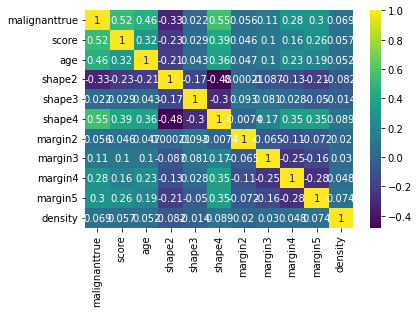

In [89]:
sns.heatmap(df.corr(), annot = True, cmap="viridis")

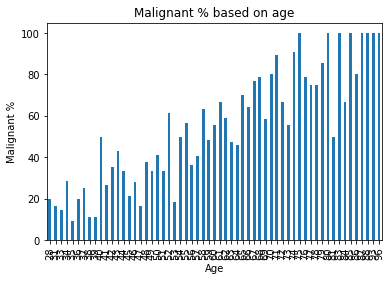

In [90]:
dfs = [rows for _, rows in df.groupby('malignanttrue')] 
    
SurS= pd.DataFrame()
SurS["Mal_Age"] = dfs[1]["age"].value_counts().to_frame()
SurS["Not_Mal_Age"] = dfs[0]["age"].value_counts().to_frame()
SurS[["Mal_Age", "Not_Mal_Age"]] = SurS[["Mal_Age", "Not_Mal_Age"]].fillna(0)
SurS["Total"]=SurS["Mal_Age"]+SurS["Not_Mal_Age"]
SurS["%"]=(SurS["Mal_Age"]/SurS["Total"])*100

#SurS.sort_values("%", ascending=True, inplace=False)
SurS.sort_index(ascending=True, inplace=True)
#SurS
SurS["%"].transpose().plot(kind = 'bar')

plt.ylabel('Malignant %')
plt.xlabel('Age')
plt.title('Malignant % based on age')

plt.show()

# With an increase in age the malignancy rate increases

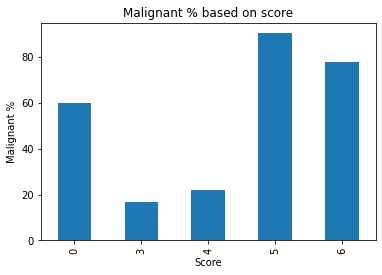

In [91]:
dfs = [rows for _, rows in df.groupby('malignanttrue')] 
    
SurS= pd.DataFrame()
SurS["Mal_Score"] = dfs[1]["score"].value_counts().to_frame()
SurS["Not_Mal_Score"] = dfs[0]["score"].value_counts().to_frame()
SurS[["Mal_Score", "Not_Mal_Score"]] = SurS[["Mal_Score", "Not_Mal_Score"]].fillna(0)
SurS["Total"]=SurS["Mal_Score"]+SurS["Not_Mal_Score"]
SurS["%"]=(SurS["Mal_Score"]/SurS["Total"])*100

SurS.sort_index(ascending=True, inplace=True)
#SurS
SurS["%"].transpose().plot(kind = 'bar')

plt.ylabel('Malignant %')
plt.xlabel('Score')
plt.title('Malignant % based on score')

plt.show()

#  Legions with a margin of 5 has the highest malignancy rate followed my margins classified as 6

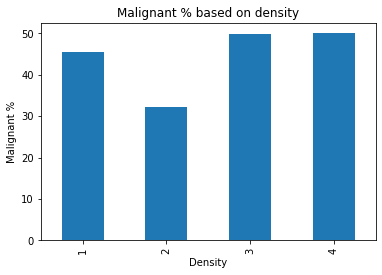

In [92]:
dfs = [rows for _, rows in df.groupby('malignanttrue')] 
    
SurS= pd.DataFrame()
SurS["Mal_Density"] = dfs[1]["density"].value_counts().to_frame()
SurS["Not_Mal_Density"] = dfs[0]["density"].value_counts().to_frame()
SurS[["Mal_Density", "Not_Mal_Density"]] = SurS[["Mal_Density", "Not_Mal_Density"]].fillna(0)
SurS["Total"]=SurS["Mal_Density"]+SurS["Not_Mal_Density"]
SurS["%"]=(SurS["Mal_Density"]/SurS["Total"])*100

#SurS.sort_values("%", ascending=True, inplace=False)
SurS.sort_index(ascending=True, inplace=True)
#SurS
SurS["%"].transpose().plot(kind = 'bar')

plt.ylabel('Malignant %')
plt.xlabel('Density')
plt.title('Malignant % based on density')

plt.show()

# Legions with a density of 3 and 4 has the highest malignancy rate followed by legions with a density of 1

In [94]:
# Split data into features (X) and response (y)
X = df.iloc[:, 1:11] 
y = df.iloc[:,0] 

# Change the array shape of the output from a dataframe single column vector
# to a contignuous flattened array
y = np.ravel(y)

# Split the data into the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [95]:
# Scale the data
scaler = StandardScaler()   

# Fit using only the training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)

# Same transformation to test data
X_test = scaler.transform(X_test)

In [96]:
# Fit and check accuracy for various numbers of nodes on both layers
# Use cross validation
validation_scores = {}
#print("Nodes |Validation")
#print("      | score")

for hidden_layer_size in [(i,j) for i in range(3,7) for j in range(3,7)]:

    reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=hidden_layer_size, random_state=1)

    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=2)
    validation_scores[hidden_layer_size] = score.mean()
    #print(hidden_layer_size, ": %0.5f" % validation_scores[hidden_layer_size])
    
# Check scores
print("The highest validation score is: %0.4f" % max(validation_scores.values()))  
optimal_hidden_layer_size = [name for name, score in validation_scores.items() 
                              if score==max(validation_scores.values())][0]
print("This corresponds to nodes", optimal_hidden_layer_size )

# Fit data with best parameter
clf = MLPClassifier(max_iter=1000, 
                    hidden_layer_sizes=optimal_hidden_layer_size, 
                    random_state=1)
clf.fit(X_train, y_train)

The highest validation score is: 0.8280
This corresponds to nodes (4, 4)


MLPClassifier(hidden_layer_sizes=(4, 4), max_iter=1000, random_state=1)

In [97]:
# Predict
y_pred = clf.predict(X_test)

# Accuracy 
accuracy_score(y_pred,y_test)

0.8461538461538461

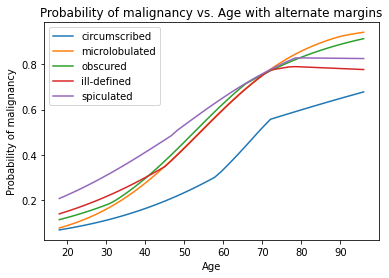

In [98]:
# Visualise probability of malignancy vs age with alternate margins
# Copy dataframe so as not to change the original, and obtain means
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.mean()).transpose()

# Different probabilities for different margins
margin= range(4,9)

for i in margin: 
    # Change margins
    X_design_vec.loc[0,["margin2","margin3","margin4","margin5"]]=[0,0,0,0]
    if i!=4:
        X_design_vec.iloc[0,i]=1
    
    # Find the min and max of the desired feature and set up a sequence
    min_resultant = min(X.loc[:,"age"])
    max_resultant = max(X.loc[:,"age"])
    seq = np.linspace(start=min_resultant,stop=max_resultant,num=50)

    # Set up a list of moving resultants
    to_predict = []
    for result in seq:
        X_design_vec.loc[0,"age"] = result
        to_predict.append(X_design_vec.copy())

    # Convert back to DataFrame
    to_predict = pd.concat(to_predict)

    # Scale and predict
    to_predict = scaler.transform(to_predict)
    predictions = clf.predict_proba(to_predict)

    # Plot 
    plt.plot(seq,predictions[:,1])
plt.xlabel("Age")
plt.ylabel("Probability of malignancy")
plt.title("Probability of malignancy vs. Age with alternate margins")
plt.legend(labels=["circumscribed","microlobulated","obscured","ill-defined","spiculated"],loc='best')
plt.show()

A response curve graphically shows the relationship between the features and the response.  A response curve can be used to draw conclusions.

From the response curve we can observe that spiculated margins have the highest probability for malignancy for ages up until 70 years.  After 70 years microlobulated margins have the highest probability of malignancy.  
Circumscribed margins have the lowest probability  of malignancy.  

Between ages 30 and 40 years the probability for malignancy start to increase more sharply.  For ages younger than 30 years, regular screening for cancer is not necessary because the probability for malignancy is below 25%.  At 45 years of age the spiculated margins have almost a 50% probability of being malignant.  It is recommended that after 40 years of age screening for breast cancer should be doen regularly.